In [11]:
import qforte
import numpy
import scipy
from scipy.optimize import minimize

In [12]:
help(qforte)

Help on package qforte:

NAME
    qforte

PACKAGE CONTENTS
    experiment (package)
    measure_test
    qforte
    vqe (package)

FUNCTIONS
    make_gate(...) method of builtins.PyCapsule instance
        make_gate(type: str, target: int, control: int, parameter: float=0.0, mirror: bool=False) -> qforte.qforte.QuantumGate

VERSION
    0.1

AUTHOR
    Qforte Dev

FILE
    /Users/nstair/Src/Qforte/qforte/build/lib.macosx-10.7-x86_64-3.6/qforte/__init__.py




# want to make a parameterized gate acting on a single qubit that is simply a rotation 


In [13]:
def prep_circuit_maker(param):
    temp_gate = qforte.make_gate("Rx", 0, 0, param)
    return temp_gate

def exp_avg(measurements):
    nume = sum(measurements)
    denom = len(measurements)
    return nume/denom

def Energy(Theta): 
    wfn1 = qforte.QuantumComputer(1)
    Rot = prep_circuit_maker(Theta)
    wfn1.apply_gate(Rot)
    measurements = wfn1.measure_circuit(H, 100000)
    return exp_avg(measurements)
        

# Start the Quantum Computer

In [14]:
# initialize a quantum computer object representing our wfn
wfn = qforte.QuantumComputer(1)
wfn.str()

['(1.000000 +0.000000 i) |0>', '(0.000000 +0.000000 i) |1>']

# A single state preparation 

In [15]:

#make a state preparation circuit with an angle of 1.71 rads
p1 = prep_circuit_maker(1.71)
print(p1.str())

#apply the state preperatio circuit to build the state
wfn.apply_gate(p1)
wfn.str()

Rx gate, target qubit:0, contol qubit:0
  +0.656219 +0.000000 i  -0.000000 -0.754571 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i
  -0.000000 -0.754571 i  +0.656219 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i
  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i
  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i



['(0.656219 +0.000000 i) |0>', '(0.000000 -0.754571 i) |1>']

# Consider a hamiltonian as a single Z gate

In [16]:
#make hamiltonian 
H = qforte.QuantumCircuit()
z0 = qforte.make_gate('Z',0,0)
H.add_gate(z0)
H.str()

['Z gate, target qubit:0, contol qubit:0\n  +1.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i\n  +0.000000 +0.000000 i  -1.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i\n  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i\n  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i\n']

# Make an array of anlges to plot the PES

In [17]:
angle_range = numpy.linspace(0.0, 2 * numpy.pi, 20)
exp_vals = [None]*len(angle_range)

for k in range (len(angle_range)):
    wfn1 = qforte.QuantumComputer(1)
    #print(wfn1.str())
    Rot = prep_circuit_maker(angle_range[k])
    wfn1.apply_gate(Rot)
    measurements = wfn1.measure_circuit(H,1000)
    exp_vals[k] = exp_avg(measurements)
    



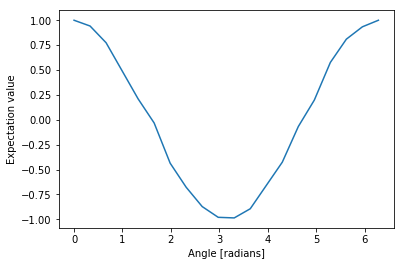

In [18]:
import matplotlib.pyplot as plt
plt.xlabel('Angle [radians]')
plt.ylabel('Expectation value')
plt.plot(angle_range, exp_vals)
plt.show()

In [19]:
# def Energy(Theta): 
#     wfn1 = qforte.QuantumComputer(1)
#     #print(wfn1.str())
#     Rot = prep_circuit_maker(Theta)
#     wfn1.apply_gate(Rot)
#     measurements = wfn1.measure_circuit(H,1000000)
#     return exp_avg(measurements)
    

# Find param theta that minimizes energy

In [20]:
res = minimize(Energy, [0.1], method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 36
         Function evaluations: 89
